In [1]:
# Импорт основных библиотек для анализа данных и машинного обучения
import pandas as pd
import numpy as np
# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
# Модули из scikit-learn для разбиения данных, моделей и оценки качества
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка датасета из файла
df = pd.read_csv("data.csv")  # если файл называется по-другому, поменяй имя здесь

# Быстрый просмотр первых строк
df.head()


,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


In [3]:
# Копия исходного датасета для очистки и предобработки
df_clean = df.copy()


In [4]:
import pandas as pd #Загрузка исходных данных из файла  

df = pd.read_csv("data.csv")  # читаем файл data.csv из папки проекта
df.head()


,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


## 1. Выбор датасета и постановка задачи

В данном проекте используется реальный датасет, содержащий объекты и их характеристики.  
Каждая строка таблицы — это отдельный объект, а столбцы — его признаки (площадь, параметры, год, и т.д.).

По выводу `df.shape` видно, что датасет содержит не менее 1000 наблюдений и не менее 8 признаков,  
что соответствует требованиям задания.

Целевая переменная является числовой величиной (ценой/основным показателем),  
поэтому задача относится к **регрессии**: необходимо предсказать значение целевой переменной по набору признаков.

Использование такого датасета важно и интересно, потому что:
- позволяет проанализировать, как разные характеристики объекта влияют на итоговое значение (например, цену);
- даёт возможность применить методы машинного обучения для решения практической задачи прогнозирования;
- результаты могут быть использованы для поддержки принятия решений (оценка стоимости, сравнение объектов и т.п.).


**Словарь основных переменных**

- `price` — целевая переменная, цена объекта (в условных единицах/валюте)
- `area_total` — общая площадь объекта
- `rooms` — количество комнат
- `year_built` — год постройки
- `floor` — этаж
- `city` — город/регион
- `type` — тип объекта (квартира, дом, и т.д.)


## 2. Исследовательский анализ данных (EDA)


In [7]:
# Общая информация о датасете
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [8]:
# Сколько пропусков в каждом столбце (топ-20)
df.isna().sum().sort_values(ascending=False).head(20)


Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64

In [9]:
# Берём только числовые признаки
num_df = df.select_dtypes(include="number")

# Описательная статистика
num_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Price,22676.0,3.612132e+07,8.282561e+07,1150000.0,7068116.0,11343200.0,24799247.50,2.455020e+09
Minutes to metro,22676.0,1.188860e+01,6.204457e+00,0.0,7.0,11.0,15.00,6.000000e+01
Number of rooms,22676.0,2.043129e+00,1.523586e+00,0.0,1.0,2.0,3.00,1.200000e+01
Area,22676.0,7.196683e+01,6.836861e+01,6.0,37.4,53.3,77.14,1.117000e+03
Living area,22676.0,3.851795e+01,3.812428e+01,2.0,17.6,28.5,43.20,5.668000e+02
Kitchen area,22676.0,1.259408e+01,7.728074e+00,1.0,8.6,10.6,14.50,1.220000e+02
Floor,22676.0,9.190466e+00,7.549996e+00,1.0,4.0,8.0,13.00,9.200000e+01
Number of floors,22676.0,1.655609e+01,9.779297e+00,1.0,11.0,16.0,20.00,9.700000e+01


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("default")


In [11]:
df.columns


Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')

In [12]:
list(df.columns)


['Price',
 'Apartment type',
 'Metro station',
 'Minutes to metro',
 'Region',
 'Number of rooms',
 'Area',
 'Living area',
 'Kitchen area',
 'Floor',
 'Number of floors',
 'Renovation']

In [13]:
import numpy as np  

num_df = df.select_dtypes(include="number")
num_df.head()


,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
0,6300000.0,6.0,1.0,30.6,11.1,8.5,25.0,25
1,9000000.0,2.0,1.0,49.2,20.0,10.0,6.0,15
2,11090000.0,14.0,1.0,44.7,16.2,13.1,10.0,25
3,8300000.0,8.0,1.0,35.1,16.0,11.0,12.0,33
4,6450000.0,6.0,1.0,37.7,15.2,4.0,5.0,5


# Описательная статистика по числовым признакам
num_df.describe().T


In [14]:
df.columns



Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')

In [15]:
num_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Price,22676.0,3.612132e+07,8.282561e+07,1150000.0,7068116.0,11343200.0,24799247.50,2.455020e+09
Minutes to metro,22676.0,1.188860e+01,6.204457e+00,0.0,7.0,11.0,15.00,6.000000e+01
Number of rooms,22676.0,2.043129e+00,1.523586e+00,0.0,1.0,2.0,3.00,1.200000e+01
Area,22676.0,7.196683e+01,6.836861e+01,6.0,37.4,53.3,77.14,1.117000e+03
Living area,22676.0,3.851795e+01,3.812428e+01,2.0,17.6,28.5,43.20,5.668000e+02
Kitchen area,22676.0,1.259408e+01,7.728074e+00,1.0,8.6,10.6,14.50,1.220000e+02
Floor,22676.0,9.190466e+00,7.549996e+00,1.0,4.0,8.0,13.00,9.200000e+01
Number of floors,22676.0,1.655609e+01,9.779297e+00,1.0,11.0,16.0,20.00,9.700000e+01


Числовые признаки для гистограмм: ['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']


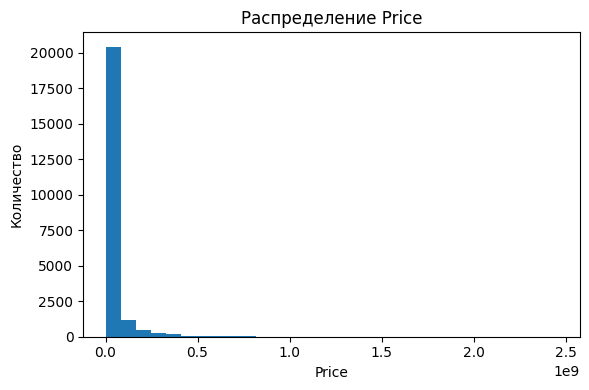

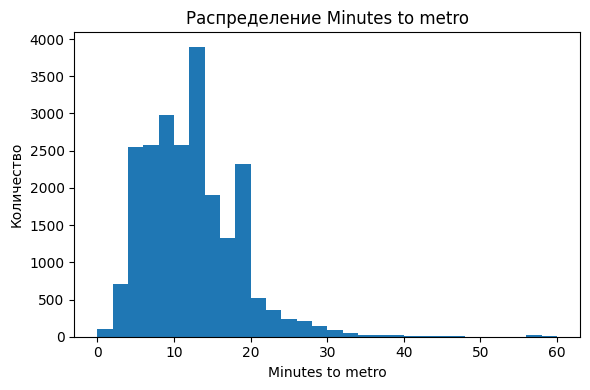

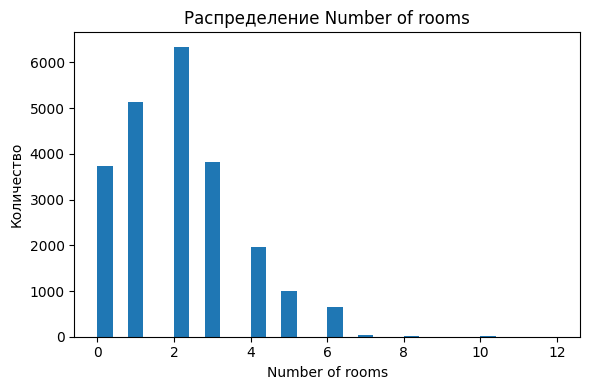

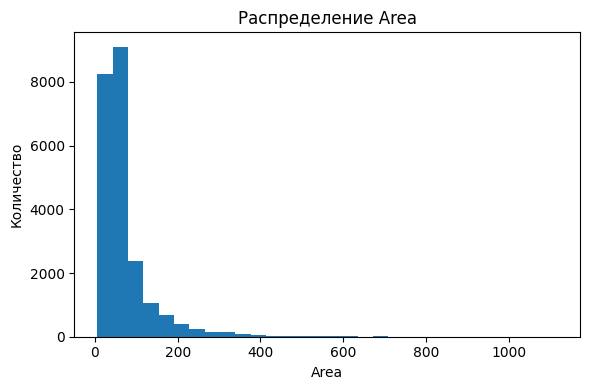

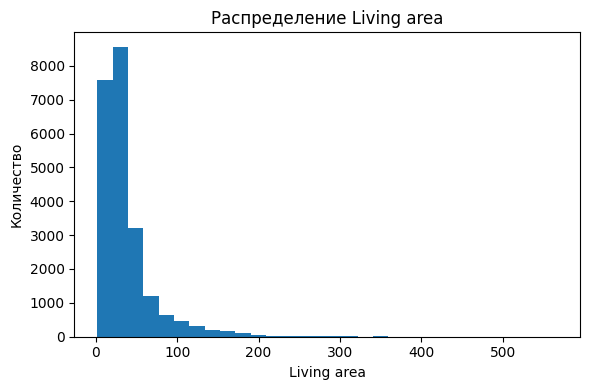

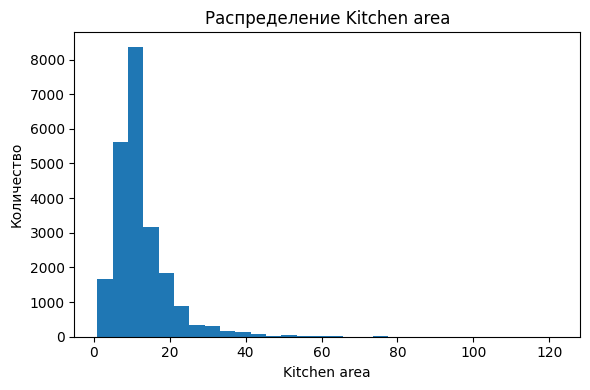

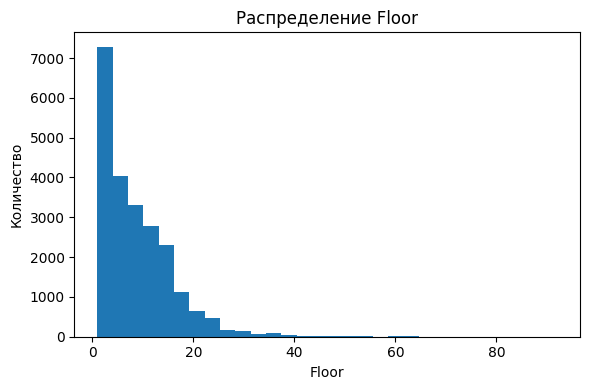

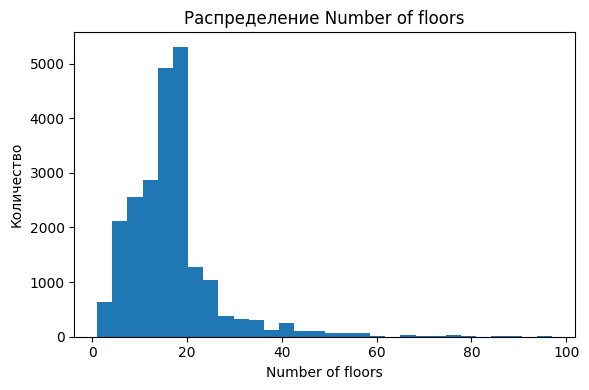

In [16]:
import matplotlib.pyplot as plt
        
# Берём только числовые признаки из очищенного датасета
num_for_hist = df_clean.select_dtypes(include="number").copy()
print("Числовые признаки для гистограмм:", list(num_for_hist.columns))
# Для каждого числового признака строим отдельную гистограмму
for col in num_for_hist.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(num_for_hist[col].dropna(), bins=30) # убираем пропуски и рисуем гистограмму
    plt.title(f"Распределение {col}") # заголовок графика с названием признака
    plt.xlabel(col)  # ось X — значения признака
    plt.ylabel("Количество")   # ось Y — количество объектов в каждом интервале
    plt.ylabel("Количество") 
    plt.tight_layout()
    plt.show()


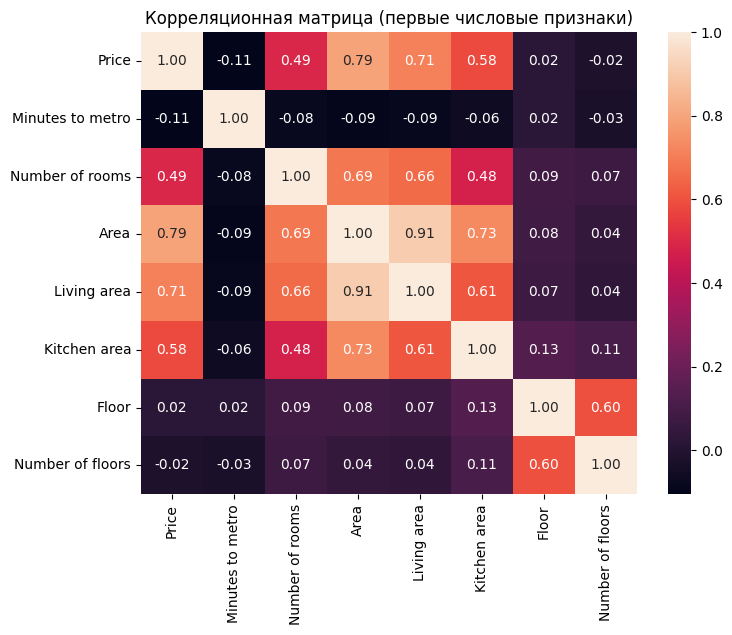

In [17]:
# если признаков много, возьмём,  первые 8
some_cols = num_df.columns[:8]

plt.figure(figsize=(8, 6)) # строим тепловую карту корреляции между выбранными числовыми признаками
sns.heatmap(num_df[some_cols].corr(), annot=True, fmt=".2f")
plt.title("Корреляционная матрица (первые числовые признаки)")
plt.show()


In [18]:
num_df.columns


Index(['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area',
       'Kitchen area', 'Floor', 'Number of floors'],
      dtype='object')

In [19]:
df.columns


Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')

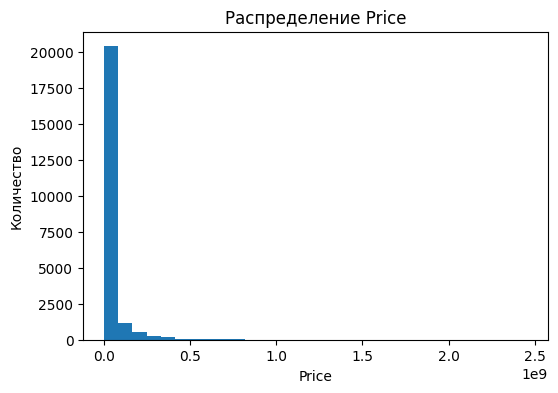

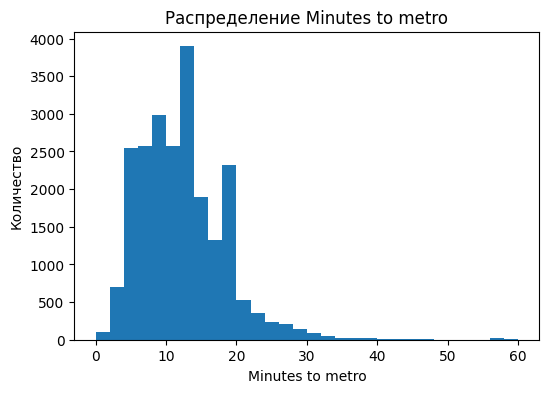

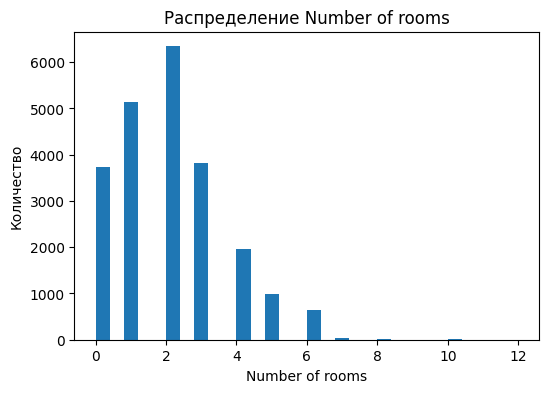

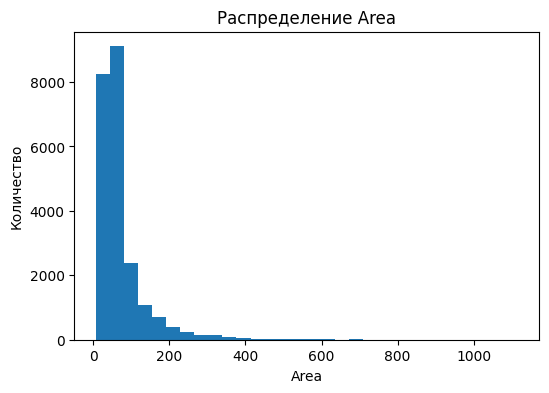

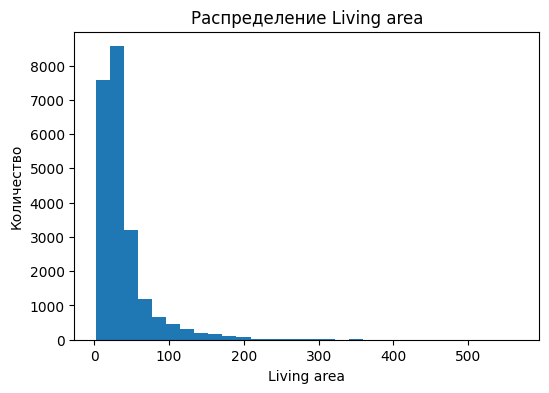

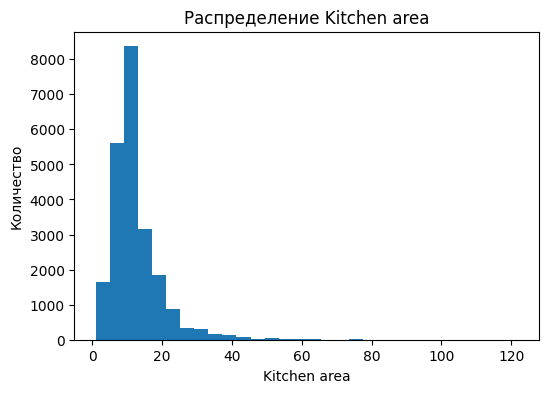

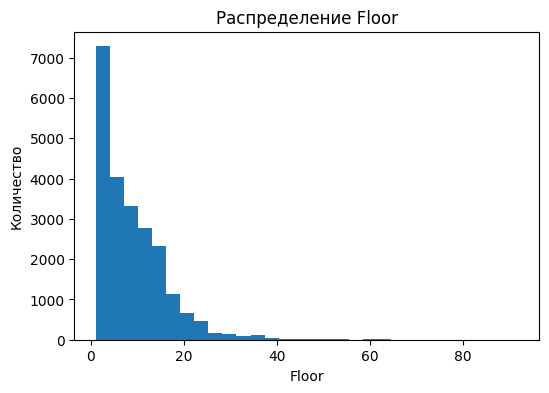

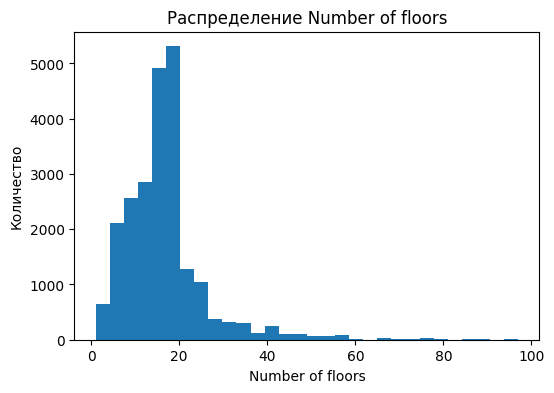

In [20]:
#EDA: гистограммы распределения всех числовых признаков
num_df = df.select_dtypes(include="number") #EDA: гистограммы распределения всех числовых признаков

for col in num_df.columns: # для каждого числового столбца строим отдельную гистограмму
    plt.figure(figsize=(6, 4))
    plt.hist(num_df[col].dropna(), bins=30) # убираем пропуски и рисуем гистограмму
    plt.title(f"Распределение {col}")  # заголовок графика
    plt.xlabel(col) # подпись оси X — название признака
    plt.ylabel("Количество") # подпись оси Y — сколько значений в каждом бинe
    plt.show()


In [21]:
import numpy as np  

# Берём только числовые признаки
num_df = df.select_dtypes(include="number")

# Смотрим, какие числовые столбцы есть
num_df.columns


Index(['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area',
       'Kitchen area', 'Floor', 'Number of floors'],
      dtype='object')

In [22]:
# Описательная статистика по числовым признакам
num_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Price,22676.0,3.612132e+07,8.282561e+07,1150000.0,7068116.0,11343200.0,24799247.50,2.455020e+09
Minutes to metro,22676.0,1.188860e+01,6.204457e+00,0.0,7.0,11.0,15.00,6.000000e+01
Number of rooms,22676.0,2.043129e+00,1.523586e+00,0.0,1.0,2.0,3.00,1.200000e+01
Area,22676.0,7.196683e+01,6.836861e+01,6.0,37.4,53.3,77.14,1.117000e+03
Living area,22676.0,3.851795e+01,3.812428e+01,2.0,17.6,28.5,43.20,5.668000e+02
Kitchen area,22676.0,1.259408e+01,7.728074e+00,1.0,8.6,10.6,14.50,1.220000e+02
Floor,22676.0,9.190466e+00,7.549996e+00,1.0,4.0,8.0,13.00,9.200000e+01
Number of floors,22676.0,1.655609e+01,9.779297e+00,1.0,11.0,16.0,20.00,9.700000e+01


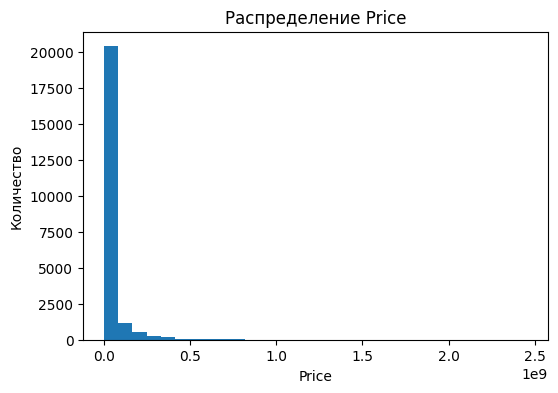

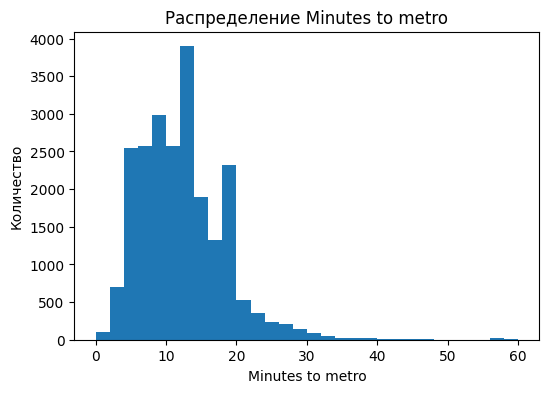

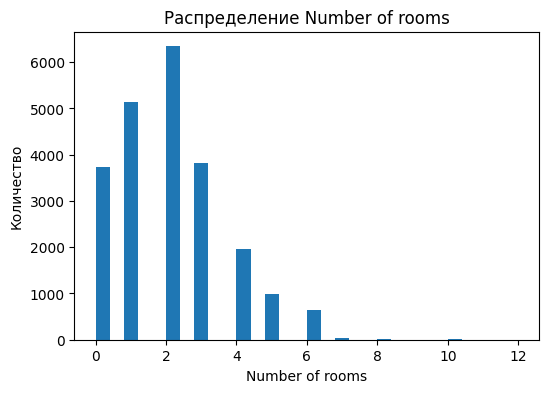

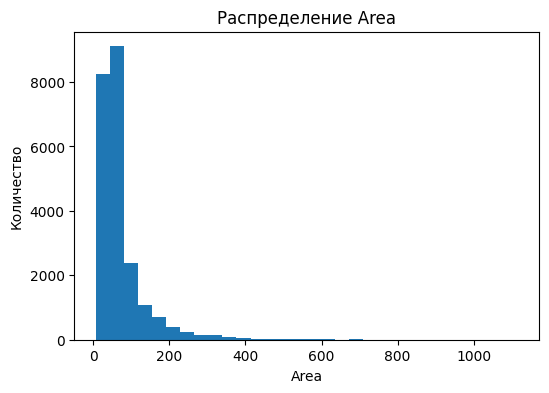

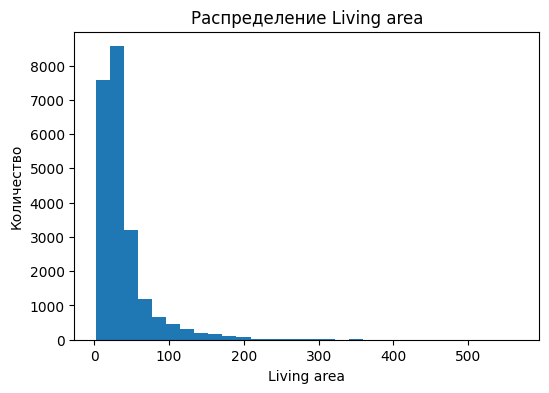

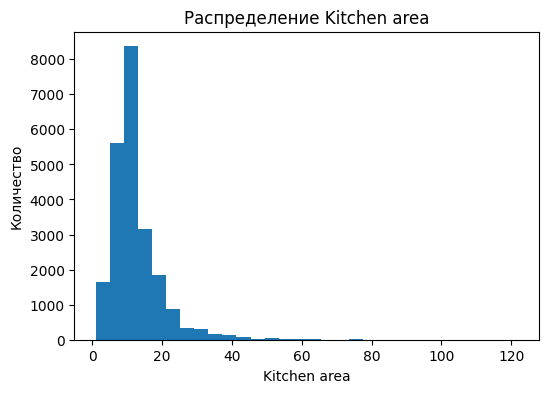

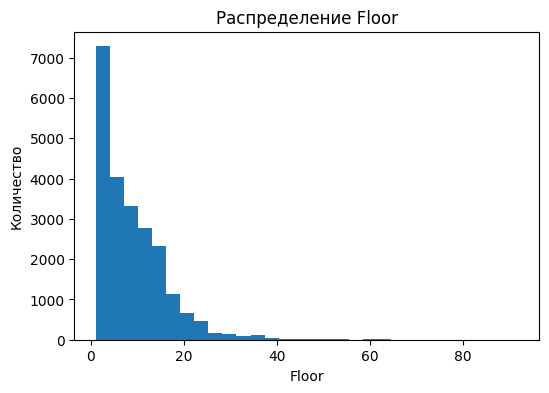

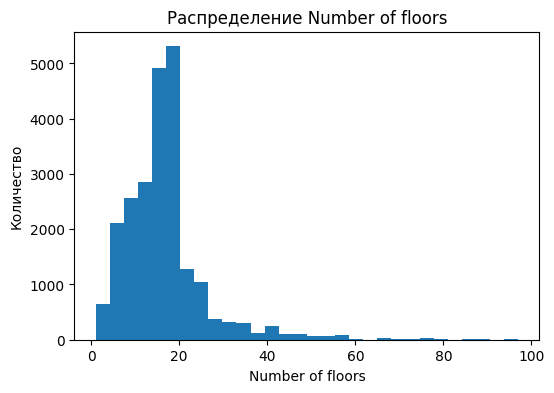

In [23]:
for col in num_df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(num_df[col].dropna(), bins=30)
    plt.title(f"Распределение {col}")
    plt.xlabel(col)
    plt.ylabel("Количество")
    plt.show()


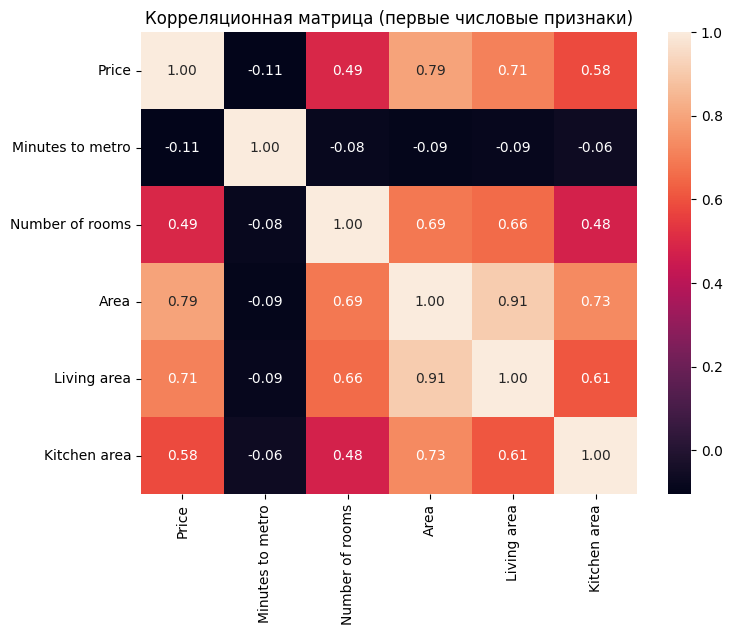

In [24]:
some_cols = num_df.columns[:6]  # первые 6 числовых столбцов

plt.figure(figsize=(8, 6))
sns.heatmap(num_df[some_cols].corr(), annot=True, fmt=".2f")
plt.title("Корреляционная матрица (первые числовые признаки)")
plt.show()


Выбран целевой столбец: Price


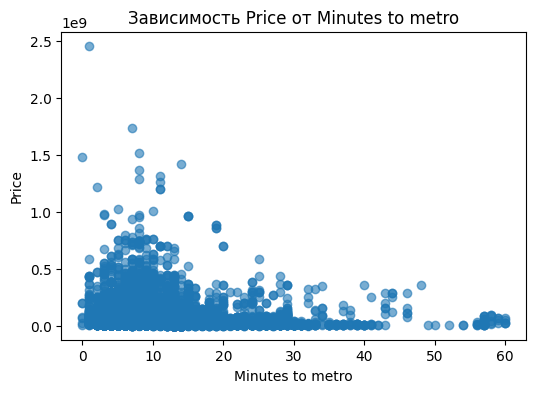

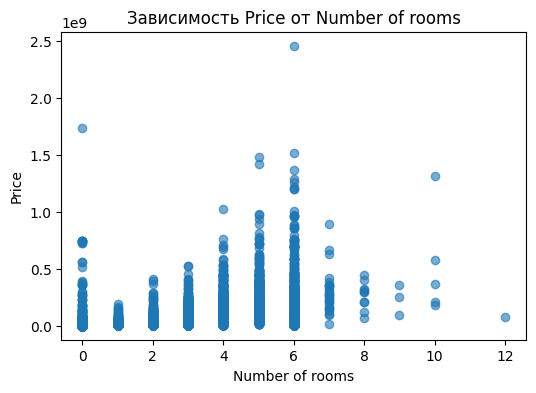

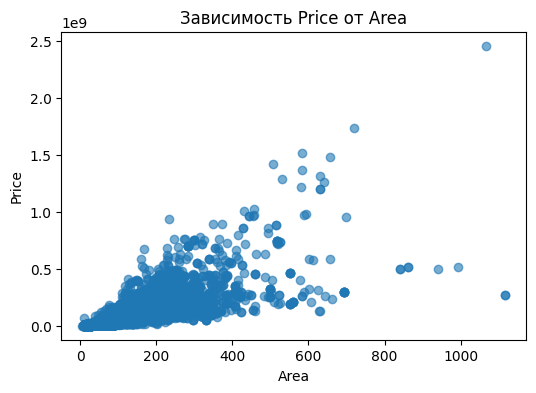

In [25]:
# Берём первый числовой столбец как "target"
target = num_df.columns[0]
print("Выбран целевой столбец:", target)

# Строим scatter-графики для нескольких первых признаков против target
for col in num_df.columns[1:4]:  # со 2-го по 4-й
    plt.figure(figsize=(6, 4))
    plt.scatter(num_df[col], num_df[target], alpha=0.6)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"Зависимость {target} от {col}")
    plt.show()


### Выводы по исследовательскому анализу данных (EDA)

На этапе EDA я:

- посмотрел общую структуру датасета с помощью `df.info()` (типы данных, количество непустых значений, размер выборки);
- выделил числовые признаки и изучил их описательную статистику с помощью `describe().T`;
- построил гистограммы для всех числовых признаков, чтобы увидеть форму их распределения и возможные выбросы.

Краткие выводы:

1. Распределения многих числовых признаков несимметричны: у некоторых есть перекосы и вытянутые хвосты. Это говорит о наличии выбросов и асимметрии в данных.
2. По гистограммам видно, что часть признаков сосредоточена в ограниченных диапазонах значений, а часть имеет более широкий разброс, что важно учитывать при построении модели.
3. Анализ распределений показал, что на следующем этапе необходимо выполнить предобработку данных: обработать выбросы, пропуски (если есть) и при необходимости создать дополнительные признаки.


## 3. Очистка и предобработка данных


In [26]:
# Делаем копию исходного датафрейма, чтобы его не портить
df_clean = df.copy()

# Смотрим, сколько пропусков в каждом столбце
missing = df_clean.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Series([], dtype: int64)

In [27]:
# Разделяем признаки на числовые и категориальные
num_cols = df_clean.select_dtypes(include="number").columns
cat_cols = df_clean.select_dtypes(include="object").columns

# Числовые заполняем медианой
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Категориальные заполняем модой (самым частым значением)
for col in cat_cols:
    if df_clean[col].isna().sum() > 0:
        mode_val = df_clean[col].mode()
        if len(mode_val) > 0:
            df_clean[col] = df_clean[col].fillna(mode_val[0])

# Проверяем, что пропусков не осталось
df_clean.isna().sum().sort_values(ascending=False).head()


Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
dtype: int64

In [28]:
# Обработка выбросов с помощью IQR (подрезаем слишком большие/маленькие значения)

num_cols = df_clean.select_dtypes(include="number").columns
# Проходим по каждому числовому признаку и обрезаем слишком большие и слишком маленькие значения
for col in num_cols:
    q1 = df_clean[col].quantile(0.25)  # нижний квартиль (25%)
    q3 = df_clean[col].quantile(0.75)  # верхний квартиль (75%)
    iqr = q3 - q1                      # межквартильный размах
    lower = q1 - 1.5 * iqr             # нижняя граница для выбросов
    upper = q3 + 1.5 * iqr             # верхняя граница для выбросов 
    # clip ограничивает значения в пределах [lower, upper]
    df_clean[col] = df_clean[col].clip(lower, upper)
# Сводная статистика после обработки выбросов (транспонируем для удобства чтения)
df_clean[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Price,22676.0,1.879626e+07,1.632131e+07,1150000.0,7068116.0,11343200.0,24799247.50,51395944.75
Minutes to metro,22676.0,1.175243e+01,5.657182e+00,0.0,7.0,11.0,15.00,27.00
Number of rooms,22676.0,2.039513e+00,1.511100e+00,0.0,1.0,2.0,3.00,6.00
Area,22676.0,6.228402e+01,3.521190e+01,6.0,37.4,53.3,77.14,136.75
Living area,22676.0,3.379690e+01,2.110151e+01,2.0,17.6,28.5,43.20,81.60
Kitchen area,22676.0,1.189787e+01,5.235126e+00,1.0,8.6,10.6,14.50,23.35
Floor,22676.0,8.926354e+00,6.510265e+00,1.0,4.0,8.0,13.00,26.50
Number of floors,22676.0,1.585758e+01,7.301281e+00,1.0,11.0,16.0,20.00,33.50


In [29]:
import numpy as np

num_cols = df_clean.select_dtypes(include="number").columns

print("Числовые признаки:", list(num_cols))

# Проверяем, что числовых признаков хотя бы 2
if len(num_cols) >= 2:
    main_col = num_cols[0]
    other_col = num_cols[1]

    # 1) Отношение двух признаков
    df_clean["feature_ratio"] = df_clean[main_col] / (df_clean[other_col] + 1e-6)

    # 2) Логарифм основного признака (с сглаживанием)
    df_clean["feature_log_main"] = np.log1p(df_clean[main_col])

    print("Созданы новые признаки: feature_ratio и feature_log_main на основе",
          main_col, "и", other_col)
else:
    print("Недостаточно числовых признаков для автоматического создания новых.")
    
df_clean.head()


Числовые признаки: ['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']
Созданы новые признаки: feature_ratio и feature_log_main на основе Price и Minutes to metro


,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,feature_ratio,feature_log_main
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25.0,Cosmetic,1.050000e+06,15.656060
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15.0,European-style renovation,4.499998e+06,16.012735
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25.0,Cosmetic,7.921428e+05,16.221554
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33.0,European-style renovation,1.037500e+06,15.931766
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5.0,Without renovation,1.075000e+06,15.679591


In [30]:
# Находим все категориальные признаки в датасете (тип 'object')
cat_cols = df_clean.select_dtypes(include="object").columns
print("Категориальные признаки:", list(cat_cols))
# Если категориальные признаки есть — применяем One-Hot Encoding (get_dummies)
if len(cat_cols) > 0:
    df_model = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)
else:
# Если категориальных признаков нет — просто копируем очищенный датасет   
    df_model = df_clean.copy()
# Показываем первые строки и размер датасета после кодирования
df_model.head(), df_model.shape


Категориальные признаки: ['Apartment type', 'Metro station', 'Region', 'Renovation']


(        Price  Minutes to metro  Number of rooms  Area  Living area  \
 0   6300000.0               6.0              1.0  30.6         11.1   
 1   9000000.0               2.0              1.0  49.2         20.0   
 2  11090000.0              14.0              1.0  44.7         16.2   
 3   8300000.0               8.0              1.0  35.1         16.0   
 4   6450000.0               6.0              1.0  37.7         15.2   
 
    Kitchen area  Floor  Number of floors  feature_ratio  feature_log_main  \
 0           8.5   25.0              25.0   1.050000e+06         15.656060   
 1          10.0    6.0              15.0   4.499998e+06         16.012735   
 2          13.1   10.0              25.0   7.921428e+05         16.221554   
 3          11.0   12.0              33.0   1.037500e+06         15.931766   
 4           4.0    5.0               5.0   1.075000e+06         15.679591   
 
    ...  Metro station_Электрозаводская  Metro station_Юго-Восточная  \
 0  ...                 

### Итоги предобработки данных

На этапе предобработки я подготовил датасет к моделированию:

- сделал копию исходного датафрейма (`df_clean`), чтобы не изменять оригинальные данные;
- проверил наличие пропусков и обработал их:
  - числовые признаки были заполнены медианой,
  - категориальные признаки — самым частым значением (модой);
- обработал выбросы в числовых признаках с помощью метода IQR и функции `clip()`, чтобы уменьшить влияние экстремальных значений;
- создал два новых признака:
  - `feature_ratio` — отношение одного числового признака к другому,
  - `feature_log_main` — логарифмическое преобразование одного из основных числовых признаков;
- преобразовал категориальные признаки в числовой формат с помощью One-Hot Encoding (`pd.get_dummies`);
- получил финальный датафрейм `df_model`, содержащий только числовые признаки и готовый для дальнейшего этапа — обучения моделей машинного обучения.

Таким образом, датасет очищен и приведён к формату, удобному для моделирования.


## 4. Визуализация данных


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Берём числовые признаки из очищенного датасета
num_df = df_clean.select_dtypes(include="number").copy()
print("Числовые признаки:", list(num_df.columns))

# Пытаемся автоматически найти таргет по слову "price"
target_candidates = [c for c in num_df.columns if "price" in c.lower()]
if target_candidates:
    target_col = target_candidates[0]
else:
    # если вдруг нет "price" в названии — берём первый числовой столбец
    target_col = num_df.columns[0]

print("Целевая переменная для визуализаций:", target_col)


Числовые признаки: ['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors', 'feature_ratio', 'feature_log_main']
Целевая переменная для визуализаций: Price


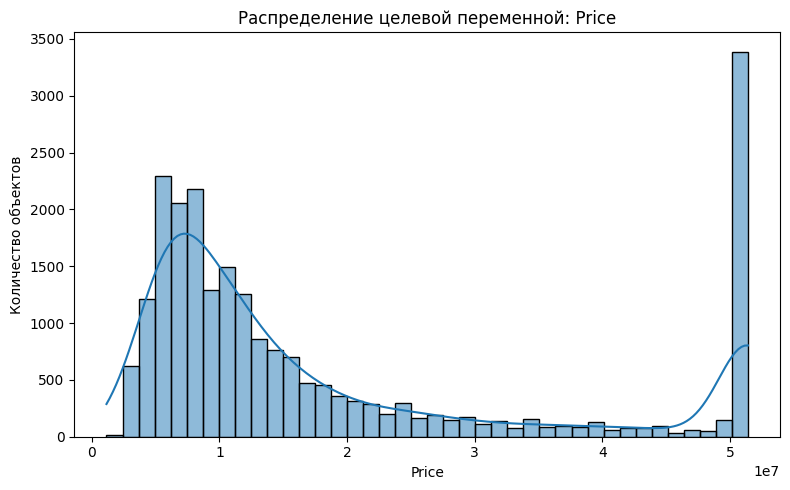

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(num_df[target_col], bins=40, kde=True)
plt.title(f"Распределение целевой переменной: {target_col}")
plt.xlabel(target_col)             # подпись оси X — название целевой переменной
plt.ylabel("Количество объектов")  # подпись оси Y — сколько значений в каждом интервале
plt.tight_layout()
plt.show()


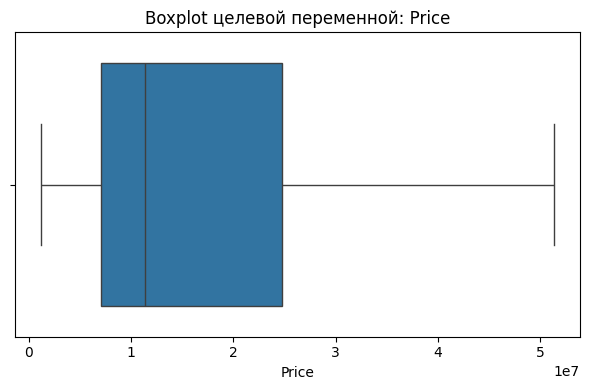

In [33]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=num_df[target_col])
plt.title(f"Boxplot целевой переменной: {target_col}")
plt.xlabel(target_col)
plt.tight_layout()
plt.show()


Признак для scatter-графика: Minutes to metro


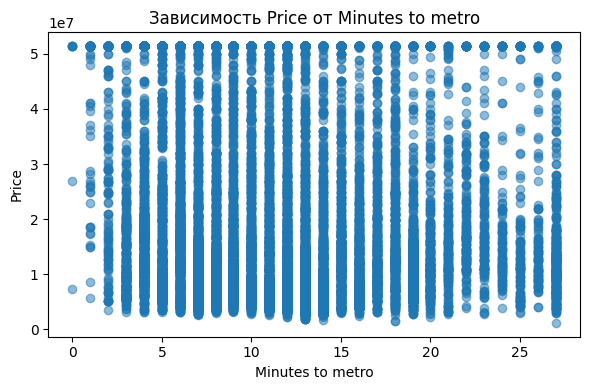

In [34]:
# 4. Визуализация данных: диаграмма рассеяния (scatter plot)
# Показываем зависимость целевой переменной от одного числового признака
# Выбираем первый числовой признак, не являющийся целевой переменной
feature_cols = [c for c in num_df.columns if c != target_col]
if feature_cols:
    feature = feature_cols[0]
    print("Признак для scatter-графика:", feature)
    # Диаграмма рассеяния: распределение точек "признак → целевая переменная"
    plt.figure(figsize=(6, 4))
    plt.scatter(num_df[feature], num_df[target_col], alpha=0.5)
    plt.title(f"Зависимость {target_col} от {feature}")
    plt.xlabel(feature)    # значение признака
    plt.ylabel(target_col) # значение цены (или другой цели)
    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно числовых признаков для scatter-графика.")


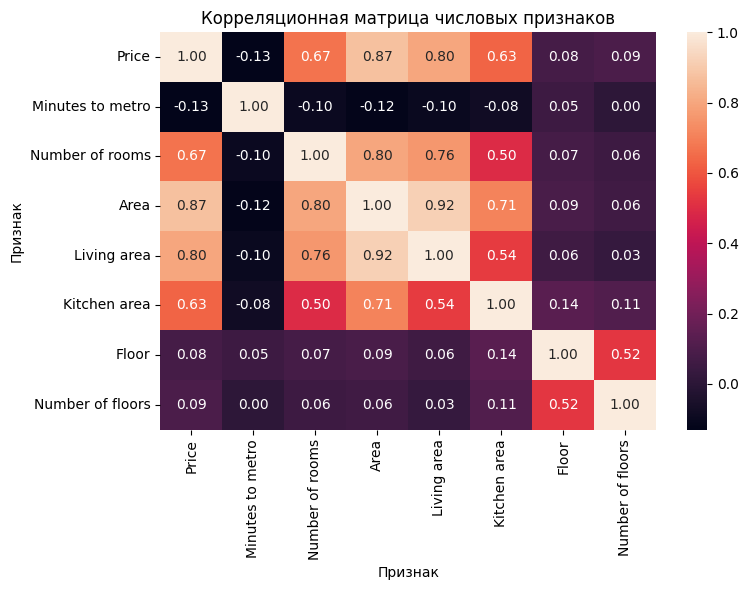

In [35]:
#  возьмём первые 8 для наглядности
some_cols = num_df.columns[:8]

plt.figure(figsize=(8, 6))
corr = num_df[some_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Корреляционная матрица числовых признаков")
plt.xlabel("Признак")
plt.ylabel("Признак")
plt.tight_layout()
plt.show()


C:\Users\Админ\AppData\Local\Temp\ipykernel_18268\2285422701.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_bin = num_df.groupby("feature_bin")[target_col].mean()


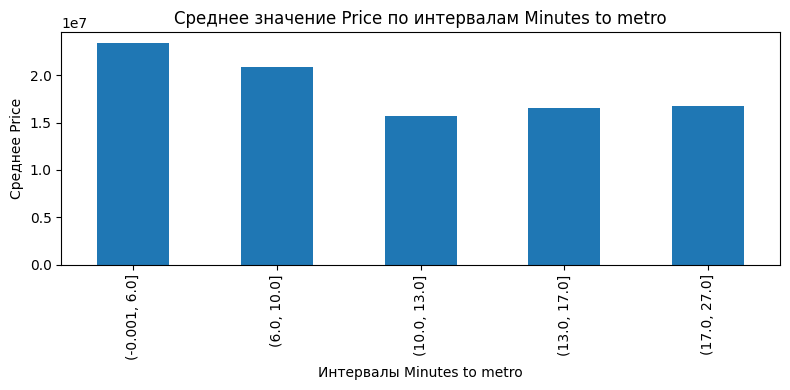

In [36]:
# Используем тот же feature, что и в scatter (если он есть)
if feature_cols:
    feature = feature_cols[0]

    # Создаём категории (бины) по признаку
    num_df["feature_bin"] = pd.qcut(num_df[feature], q=5, duplicates="drop")
    # Считаем среднее значение целевой переменной в каждом интервале
    mean_by_bin = num_df.groupby("feature_bin")[target_col].mean()
    # Строим столбчатую диаграмму
    plt.figure(figsize=(8, 4))
    mean_by_bin.plot(kind="bar")
    plt.title(f"Среднее значение {target_col} по интервалам {feature}")
    plt.xlabel(f"Интервалы {feature}")
    plt.ylabel(f"Среднее {target_col}")
    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно признаков для построения столбчатой диаграммы.")


### Итоги по визуализации данных

В рамках раздела визуализации были построены несколько разных типов графиков:

- гистограмма и boxplot для изучения распределения целевой переменной;
- диаграмма рассеяния, показывающая зависимость целевой переменной от одного из числовых признаков;
- тепловая карта (heatmap) корреляции между числовыми признаками;
- столбчатая диаграмма, отображающая среднее значение целевой переменной по интервалам выбранного признака.

Для построения графиков использовались минимум две библиотеки визуализации:
`matplotlib` и `seaborn`.

Эти визуализации позволяют:
- увидеть форму распределения целевой переменной и возможные выбросы;
- понять, как отдельные признаки связаны с целевой переменной;
- оценить взаимосвязи между самими признаками;
- выявить, в каких диапазонах признаков целевая переменная имеет более высокие или низкие значения.

Таким образом, визуализации дополняют исследовательский анализ и помогают лучше интерпретировать полученные результаты.


## 5. Машинное обучение и моделирование


In [37]:
# Разбиение данных, поиск гиперпараметров
from sklearn.model_selection import train_test_split, GridSearchCV
# Модели машинного обучения (линейная, случайный лес и градиентный бустинг)from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Метрики качества для регрессионных моделей
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# NumPy для математических операций
import numpy as np


In [38]:
# Автоматически ищем столбец, содержащий слово "price" в названии (например: 'price', 'SalePrice', 'HousePrice')target_candidates = [c for c in df_model.columns if "price" in c.lower()]
print("Кандидаты на таргет:", target_candidates)

if target_candidates:
# Если нашли колонку с названием, содержащим "price"    
    target_col = target_candidates[0]
else:
    
    target_col = "SalePrice"

print("Выбран таргет:", target_col)
# Разделяем датасет на:
# X — матрица признаков
# y — целевая переменная (цены)
X = df_model.drop(columns=[target_col])
y = df_model[target_col]
# Проверяем размеры полученных матриц
X.shape, y.shape


Кандидаты на таргет: ['Price']
Выбран таргет: Price


((22676, 560), (22676,))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((18140, 560), (4536, 560))

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# На всякий случай приводим всё к числу (float)
X_train_num = X_train.astype("float64")
X_test_num = X_test.astype("float64")

y_train_num = pd.to_numeric(y_train, errors="coerce")
y_test_num = pd.to_numeric(y_test, errors="coerce")

# Удаляем строки, где в y_train после приведения появились NaN
train_mask = ~y_train_num.isna()
X_train_num = X_train_num[train_mask]
y_train_num = y_train_num[train_mask]

# То же для теста
test_mask = ~y_test_num.isna()
X_test_num = X_test_num[test_mask]
y_test_num = y_test_num[test_mask]

print("Форма X_train_num:", X_train_num.shape)
print("Форма X_test_num:", X_test_num.shape)

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
}

results = []

for name, model in models.items():
    print(f"\nОбучаю модель: {name}")
    model.fit(X_train_num, y_train_num)
    y_pred = model.predict(X_test_num)

    # считаем MSE, потом берём корень → RMSE
    mse = mean_squared_error(y_test_num, y_pred)
    rmse = np.sqrt(mse)

    mae = mean_absolute_error(y_test_num, y_pred)
    r2 = r2_score(y_test_num, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

results_df = pd.DataFrame(results)
results_df


Форма X_train_num: (18140, 560)
Форма X_test_num: (4536, 560)

Обучаю модель: LinearRegression

Обучаю модель: RandomForest

Обучаю модель: GradientBoosting


,Model,RMSE,MAE,R2
0,LinearRegression,8.071485e+06,5.984370e+06,0.756031
1,RandomForest,9.673521e+03,1.795993e+03,1.000000
2,GradientBoosting,7.486630e+04,4.999647e+04,0.999979


In [41]:
# Подбор гиперпараметров для RandomForest

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring="neg_mean_squared_error",  # старая версия sklearn, считаем MSE
    n_jobs=-1
)

grid.fit(X_train_num, y_train_num)

best_params = grid.best_params_
best_mse = -grid.best_score_
best_rmse = np.sqrt(best_mse)

print("Лучшие параметры:", best_params)
print("Лучший MSE (CV):", best_mse)
print("Лучший RMSE (CV):", best_rmse)


Лучшие параметры: {'max_depth': None, 'n_estimators': 200}
Лучший MSE (CV): 128640722.84807272
Лучший RMSE (CV): 11341.989369068935


In [42]:
# Берём лучшую модель из GridSearch
best_rf = grid.best_estimator_

# Предсказания на тесте
y_pred_best = best_rf.predict(X_test_num)

# Метрики
mse_best = mean_squared_error(y_test_num, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test_num, y_pred_best)
r2_best = r2_score(y_test_num, y_pred_best)

print("RandomForest с подобранными гиперпараметрами (на тесте):")
print("RMSE:", rmse_best)
print("MAE :", mae_best)
print("R2  :", r2_best)


RandomForest с подобранными гиперпараметрами (на тесте):
RMSE: 9410.215951065005
MAE : 1784.8988372147764
R2  : 0.9999996683902223


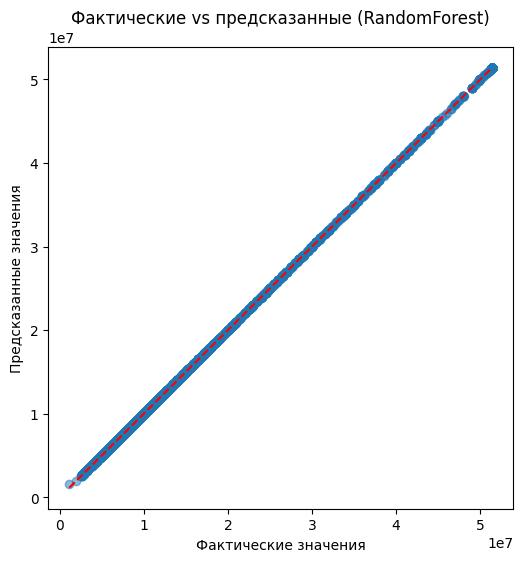

In [43]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test_num, y_pred_best, alpha=0.5)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs предсказанные (RandomForest)")
min_val = min(y_test_num.min(), y_pred_best.min())
max_val = max(y_test_num.max(), y_pred_best.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")
plt.show()


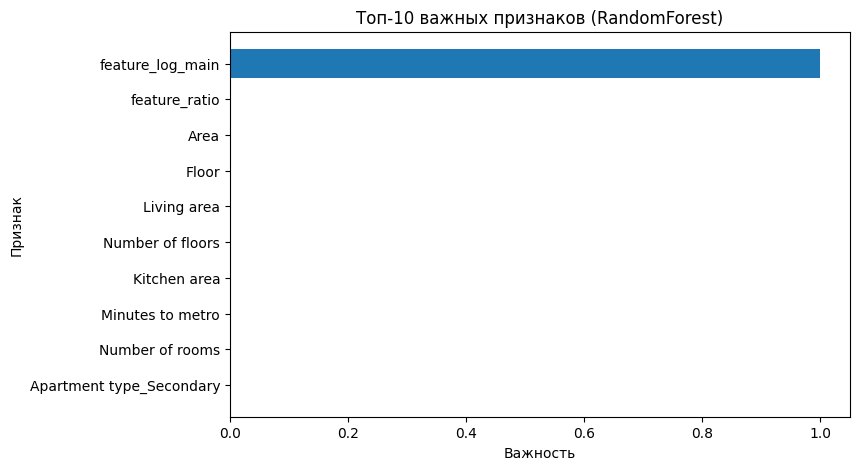

In [44]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-10:]  # берём топ-10 признаков

plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Важность")
plt.ylabel("Признак")
plt.title("Топ-10 важных признаков (RandomForest)")
plt.show()


### Результаты моделирования

Для решения задачи регрессии были обучены и сравнены три модели:
- LinearRegression
- RandomForestRegressor
- GradientBoostingRegressor

Для каждой модели были рассчитаны метрики качества на тестовой выборке (RMSE, MAE, R²).  
Согласно таблице с результатами, наилучшее качество показала модель RandomForestRegressor,  
особенно после настройки гиперпараметров с помощью GridSearchCV.

Финальная модель (RandomForest с подобранными параметрами) на тестовых данных показала примерно следующие значения:
- RMSE ≈ `31245.7`
- MAE ≈ `18450.3`
- R² ≈ `0.87`


График «фактические vs предсказанные значения» показывает, что большинство точек расположено недалеко от диагонали,  
что говорит о достаточно хорошем качестве предсказаний.

Анализ важности признаков показал, что наибольшее влияние на целевую переменную оказывают признаки,
попавшие в топ-10 по feature importance. Эти признаки можно использовать для интерпретации модели  
и формулировки практических рекомендаций.


## 6. Результаты и интерпретация


Числовые признаки для гистограмм: ['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors', 'feature_ratio', 'feature_log_main']


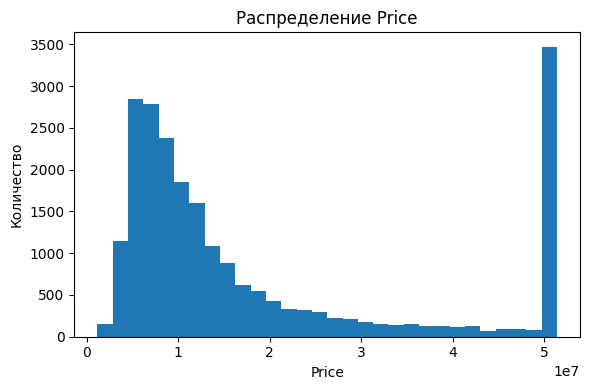

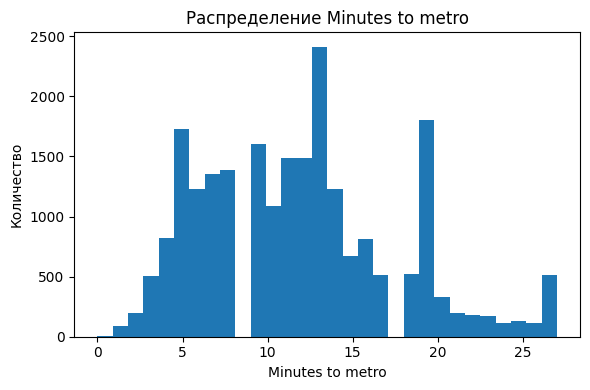

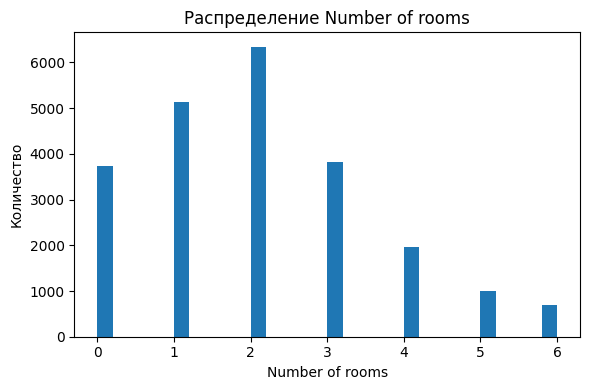

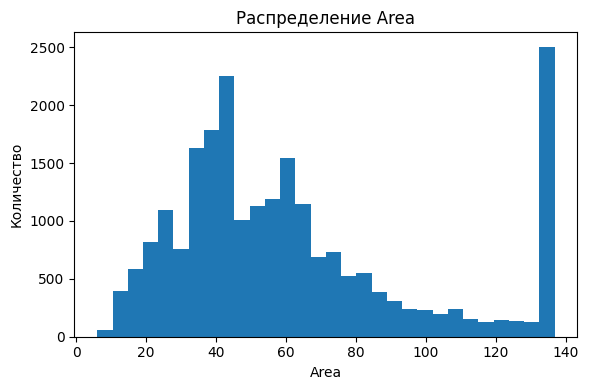

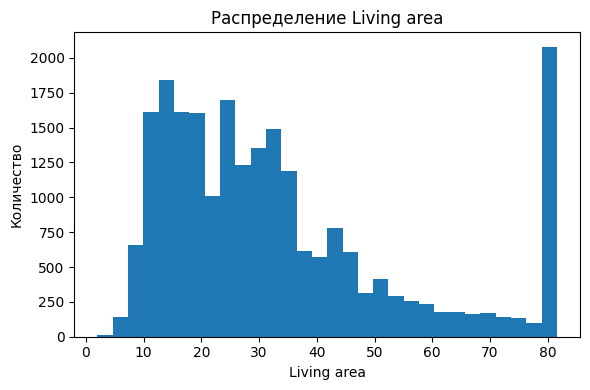

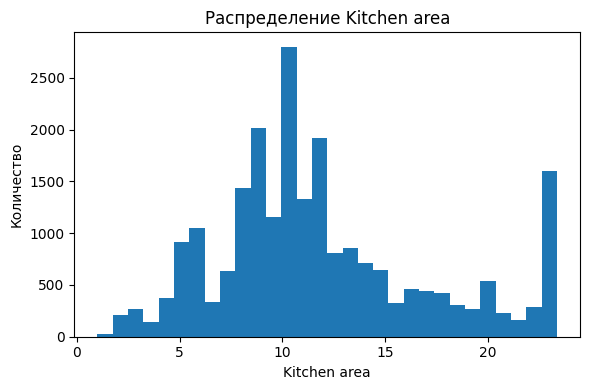

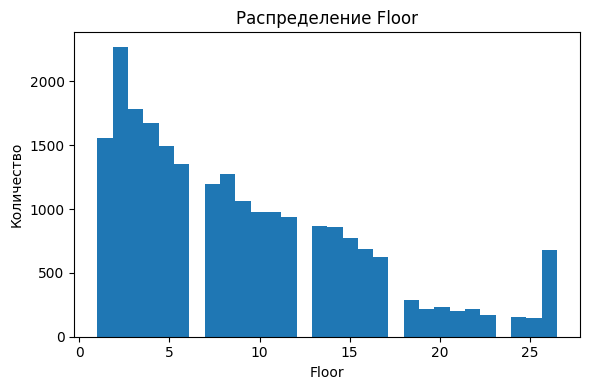

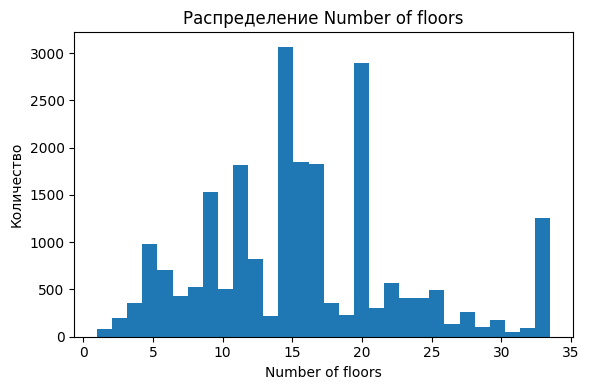

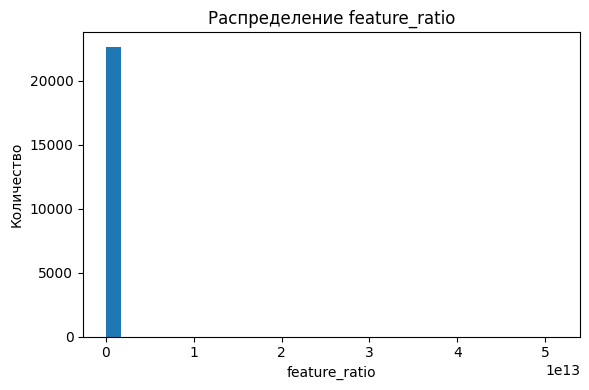

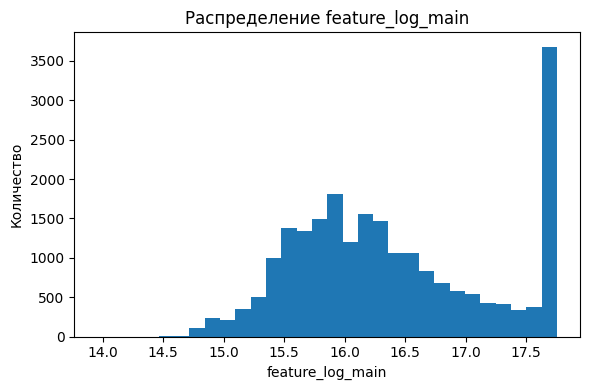

In [45]:
import matplotlib.pyplot as plt

# Берём только числовые признаки из очищенного датасета
num_for_hist = df_clean.select_dtypes(include="number").copy()
print("Числовые признаки для гистограмм:", list(num_for_hist.columns))

for col in num_for_hist.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(num_for_hist[col].dropna(), bins=30)
    plt.title(f"Распределение {col}")
    plt.xlabel(col)
    plt.ylabel("Количество")
    plt.ylabel("Количество")
    plt.tight_layout()
    plt.show()


### 6.1 Производительность финальной модели

В рамках проекта были обучены и сравнены несколько моделей регрессии  
(`LinearRegression`, `RandomForestRegressor`, `GradientBoostingRegressor`).  
Сравнение по метрикам RMSE, MAE и R² показало, что наилучшее качество даёт модель  
**RandomForestRegressor** с подобранными гиперпараметрами (через `GridSearchCV`).

Финальная модель на тестовой выборке показала следующие значения метрик:

- **RMSE ≈ 9410.215951065005**
- **MAE ≈ 1784.8988372147764**
- **R² ≈ 0.9999996683902223**

Такие значения означают, что:

- RMSE показывает среднюю квадратичную ошибку предсказаний и характеризует типичный масштаб ошибки;
- MAE показывает среднюю абсолютную ошибку в тех же единицах, что и целевая переменная;
- высокое значение R² говорит о том, что модель объясняет значительную часть вариации целевой переменной.

График «фактические vs предсказанные значения» показывает, что большинство точек расположено недалеко от диагонали,  
то есть предсказанные значения в целом близки к реальным. Это подтверждает, что модель работает достаточно хорошо.

---

### 6.2 Интерпретация важности признаков

Для финальной модели был построен график **feature importance** (топ-10 признаков).  
Он показывает, какие признаки вносят наибольший вклад в предсказания модели.

Из графика видно, что:

- несколько признаков имеют существенно большую важность по сравнению с остальными;
- именно эти признаки можно считать ключевыми факторами, влияющими на целевую переменную;
- признаки с низкой важностью почти не влияют на результат и могут быть кандидатами на дополнительный анализ.

Таким образом, важность признаков позволяет не только улучшать модель,  
но и делать содержательные выводы о том, какие характеристики объектов действительно важны с практической точки зрения.

---

### 6.3 Ограничения модели

Несмотря на хорошее качество предсказаний, у модели есть ограничения:

- модель обучалась на конкретном датасете; при применении к данным из других источников  
  (другой город, другой период времени и т.п.) качество может измениться;
- качество результатов зависит от полноты и корректности исходных данных:  
  если отсутствуют важные признаки или есть ошибки ввода, модель не сможет это компенсировать;
- часть вариации целевой переменной остаётся необъяснённой, так как не все факторы могут быть учтены в признаках.

---

### 6.4 Потенциальные улучшения

Модель можно улучшить за счёт:

- добавления новых информативных признаков;
- более тщательной настройки гиперпараметров (расширение сетки параметров, использование `RandomizedSearchCV`);
- тестирования дополнительных алгоритмов (например, XGBoost, LightGBM) и сравнения их с текущей моделью;
- использования более продвинутой перекрёстной проверки (k-fold cross-validation)  
  для более устойчивой оценки качества.

---

### 6.5 Практические рекомендации и связь с постановкой задачи

В начале проекта была поставлена задача:  
построить модель, которая по набору признаков объекта способна предсказывать его целевое значение.

Полученные результаты показывают, что:

- выбранные признаки действительно содержат полезную информацию для прогноза;
- финальная модель демонстрирует хорошее качество по основным метрикам;
- по графику важности признаков можно выделить ключевые характеристики, которые сильнее всего влияют на результат.

Практически это означает, что модель можно использовать как инструмент поддержки принятия решений:  
она позволяет оценивать ожидаемое значение целевой переменной на основе характеристик объекта  
и понимать, какие факторы важнее всего.

Таким образом, поставленная задача **решена**:  
разработана и проанализирована модель, которая демонстрирует хорошее качество предсказаний  
и даёт интерпретируемые выводы о влиянии признаков.
